# APS 5 - Questões com auxílio do Pandas

** Nome: ** <font color=blue> Rodrigo Gatti Coutinho</font>


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [84]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from scipy.stats import expon
import scipy.stats as stats

In [85]:
#Abrir o arquivo
df = pd.read_csv('earthquake(1).csv')
#listar colunas
print(list(df))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


## Liste as primeiras linhas do DataFrame

In [86]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [87]:
df.loc[(df.Latitude>0), 'Hemisfério'] = 'Norte'
df.loc[(df.Latitude<0), 'Hemisfério'] = 'Sul'
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Hemisfério
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte


## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

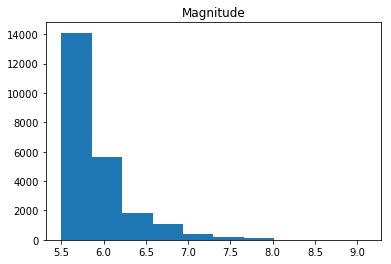

In [88]:
plot = df.Magnitude.plot.hist(title='Magnitude')
plt.ylabel('')
plt.xlabel('')

Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de **loc** e **scale**. Interprete loc e scale no caso da exponencial.
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

In [89]:
#mu=media e sigma=desvio padrao
mu, sigma = stats.expon.fit(df['Magnitude'])
print(mu,sigma)

5.49999999967 0.382548648851


Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

(array([  1.67376179e+00,   6.71189513e-01,   2.14752169e-01,
          1.30512368e-01,   4.66285096e-02,   2.53905879e-02,
          1.23393511e-02,   2.25430454e-03,   5.93238036e-04,
          3.55942821e-04]),
 array([ 5.5 ,  5.86,  6.22,  6.58,  6.94,  7.3 ,  7.66,  8.02,  8.38,
         8.74,  9.1 ]),
 <a list of 10 Patch objects>)

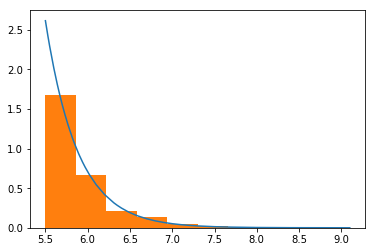

In [90]:
plt.plot(sorted (df["Magnitude"]),stats.expon.pdf(sorted(df['Magnitude']),loc=mu,scale=sigma))
plt.hist(df.Magnitude,normed=True)


## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

In [91]:
tabela_cruzamento= pd.crosstab(df.Hemisfério, df.Type, normalize=True)
tabela_cruzamento

Type,Earthquake,Explosion,Nuclear Explosion,Rock Burst
Hemisfério,,,,
Norte,0.447140,0.000085,0.006279,0.000000
Sul,0.545171,0.000085,0.001196,0.000043


### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

In [92]:
terremoto_norte= ((df.Hemisfério=='Norte') & (df.Type=='Earthquake')).value_counts()
terremoto_total= (df.Type=='Earthquake').value_counts()
probabilidade= (terremoto_norte[1])/ (terremoto_total[1]) 
probabilidade


0.45058539944903581

Explique o seu raciocínio

O exercicio pedia a probabilidada de se caso ocorresse um terremoto de, de ele ter ocorrido no hemisferio norte, entao para isso utilizei a formula de probabilidade, em que se dividia a quantidade de terremotos do norte, pelo total de terremotos.

### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

In [93]:
nuclearexpl_norte= ((df.Hemisfério=='Norte') & (df.Type=='Nuclear Explosion')).value_counts()
nuclearexp_total= (df.Hemisfério=='Norte').value_counts()
probabilidade= (nuclearexpl_norte[1])/(nuclearexp_total[1])
probabilidade

0.013845719129697655

Se conseguir obter a resposta sem calcular, insira a resposta abaixo:

* A probabilidade de ter sido `Nuclear Explosion` é 0.013845719129697655

## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

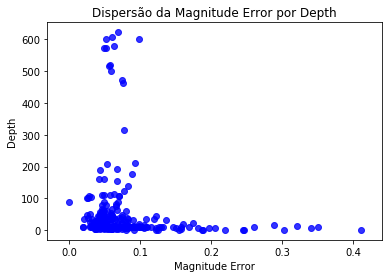

In [94]:
plt.scatter(df["Magnitude Error"], df.Depth, c='blue', alpha=0.8)
plt.title('Dispersão da Magnitude Error por Depth')
plt.xlabel('Magnitude Error')
plt.ylabel('Depth')

Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

In [95]:
print("A correlação entre as variáveis Magnitude Error e Depth: ",df["Magnitude Error"].corr(df.Depth))

A correlação entre as variáveis Magnitude Error e Depth:  -0.0769184389234


Explique o que significa o valor da correlação calculada acima? 

O valor da correlação deu negativo, pois os valores são inversos e a variancia é muito pequena.

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

In [96]:
df.Latitude.describe

<bound method NDFrame.describe of 0        19.2460
1         1.8630
2       -20.5790
3       -59.0760
4        11.9380
5       -13.4050
6        27.3570
7       -13.3090
8       -56.4520
9       -24.5630
10       -6.8070
11       -2.6080
12       54.6360
13      -18.6970
14       37.5230
15      -51.8400
16       51.2510
17       51.6390
18       52.5280
19       51.6260
20       51.0370
21       51.7300
22       51.7750
23       52.6110
24       51.8310
25       51.9480
26       51.4430
27       52.7730
28       51.7720
29       52.9750
          ...   
23382   -10.9640
23383    21.2897
23384    21.3697
23385    14.0882
23386    -4.5049
23387    -4.4244
23388    -5.6497
23389   -10.2137
23390   -34.9886
23391    -6.3046
23392     8.3489
23393   -10.1904
23394    -9.9640
23395   -10.1773
23396    37.1442
23397   -10.1785
23398   -10.1549
23399    -7.5082
23400    21.5036
23401    -5.2453
23402    -5.1460
23403   -43.4029
23404   -43.4810
23405    45.7192
23406    38.3754
23407    38.39

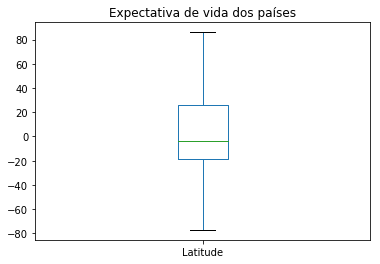

In [97]:
plot = df.Latitude.plot(kind = 'box', title='Expectativa de vida dos países')#,color='blue'

In [98]:
df.Longitude.describe

<bound method NDFrame.describe of 0        145.6160
1        127.3520
2       -173.9720
3        -23.5570
4        126.4270
5        166.6290
6         87.8670
7        166.2120
8        -27.0430
9        178.4870
10       108.9880
11       125.9520
12       161.7030
13      -177.8640
14        73.2510
15       139.7410
16       178.7150
17       175.0550
18       172.0070
19       175.7460
20       177.8480
21       173.9750
22       173.0580
23       172.5880
24       174.3680
25       173.9690
26       179.6050
27       171.9740
28       174.6960
29       171.0910
           ...   
23382    161.5723
23383    144.4037
23384    144.2175
23385    -90.8691
23386    153.5216
23387    153.5419
23388    153.9975
23389    161.2177
23390   -107.8694
23391    154.3530
23392    137.6672
23393    161.2187
23394    -70.9714
23395    161.2236
23396     84.9583
23397    160.9149
23398    160.7816
23399    127.9206
23400    145.4172
23401    153.5754
23402    153.5166
23403    -73.9395
23404    -74

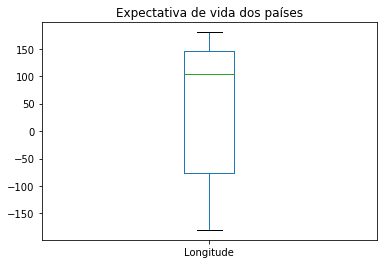

In [99]:
plot = df.Longitude.plot(kind = 'box', title='Expectativa de vida dos países')#,color='blue'

Ao analisarmos os boxplots acima, podemos perceber que a maior parte da concentração da latitude esta entre -20 e 0, e a maior parte da concentração da longitude esta entre 100 e 150. Com isso, podemos concluir que as regiões com maiores incidencias de terremoto, sao as regiões Leste e Sul.

## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes


In [100]:
tabela_magnitude_e_nuclear= df[(df['Magnitude Type'] == 'MB') & (df.Type == 'Nuclear Explosion')]

tabela_magnitude_e_nuclear.Hemisfério.value_counts(True)

Norte    0.828221
Sul      0.171779
Name: Hemisfério, dtype: float64

Ao analisarmos os resultados obtidos acima nessa ultima tabela, podemos concluir que é muito mais provavel que se ocorra na região Norte, do que na região Sul.